# Brand Loyalty Correlation Analysis

This notebook explores which factors drive Brand Loyalty using customer behavior, satisfaction, engagement, and discount-related features.

We perform:

* Data cleaning & encoding
* Pearson and Spearman correlation analysis
* Heatmaps for visualization
* Regression modeling
* Multicollinearity checks (VIF)

Interpretation of results are included throughout each step and the end of the notebook.

## Importing Data and Libraries

In [86]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

This dataset comes from ***Ecommerce Consumer Behavior Analysis Data* via. Kaggle**. This dataset captures key aspects of consumer behavior and purchasing decisions. It includes demographic details, shopping habits, product evaluations, discount sensitivity, advertising engagement, and customer satisfaction—making it useful for market segmentation, predictive modeling, and understanding what drives customer choices.

The dataset has 28 columns. Here's a general breakdown of each column, seperated by general categories:

* **Unique customer identifier** – Customer_ID
* **Demographic attributes** – Age, Gender, Income_Level, Marital_Status, Education_Level, Occupation, Location
* **Purchasing behavior** – Purchase_Category, Purchase_Amount, Frequency_of_Purchase, Purchase_Channel
* **Attitudes and feedback** – Brand_Loyalty, Product_Rating, Customer_Satisfaction
* **Research & marketing exposure** – Time_Spent_on_Product_Research, Social_Media_Influence, Engagement_with_Ads
* **Price responsiveness** – Discount_Sensitivity, Discount_Used
* **Product return frequency** – Return_Rate
* **Loyalty program membership** – Customer_Loyalty_Program_Member
* **Shopping and payment preferences** – Device_Used_for_Shopping, Payment_Method, Payment_Frequency
* **Timing-related attributes** – Time_of_Purchase, Time_to_Decision
* **Intent and fulfillment preferences** – Purchase_Intent, Shipping_Preference

In [87]:
df = pd.read_csv("/content/Ecommerce_Consumer_Behavior_Analysis_Data.csv")
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [89]:
df.describe(include='all')

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
count,1000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000.000000,744,1000,1000,1000,1000,1000,1000,1000,1000.000000
unique,1000,NaN,8,2,4,3,2,969,24,989,...,NaN,3,3,5,344,2,2,4,3,NaN
top,48-203-9118,NaN,Female,High,Widowed,Bachelor's,High,Oslo,Electronics,$178.04,...,NaN,High,Desktop,PayPal,3/3/2024,True,False,Need-based,No Preference,NaN
freq,1,NaN,452,515,260,341,517,4,54,2,...,NaN,270,350,219,8,521,509,256,372,NaN
mean,NaN,34.304000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.399000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.547000
std,NaN,9.353238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.868454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.035849
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,34.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
75%,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


### Goal Definition & Variables
**Goal**: Identify which features are associated with Brand_Loyalty (1–5) and quantify the direction, strength, and significance of those relationships.

**Target**: Brand_Loyalty

**Candidate predictors**:
Customer_Satisfaction, Product_Rating, Return_Rate, Frequency_of_Purchase, Purchase_Amount, Customer_Loyalty_Program_Member, Discount_Sensitivity, Engagement_with_Ads

These predictors were chosen because each represents a consumer behavior or experience factor that is theoretically linked to brand loyalty.

* **Customer_Satisfaction** & **Product_Rating** measure perceived product and service quality, which are primary drivers of loyalty.
* **Return_Rate** captures dissatisfaction or mismatch with expectations, often negatively associated with loyalty.
* **Frequency_of_Purchase** & **Purchase_Amount** reflect ongoing engagement and spending behavior, which tend to increase with stronger brand attachment.
* **Customer_Loyalty_Program_Member** indicates formal commitment to the brand and access to incentives designed to reinforce loyalty.
* **Discount_Sensitivity** reflects price-driven behavior that may reduce long-term loyalty if customers switch brands for deals.
* **Engagement_with_Ads** measures marketing responsiveness, which can strengthen loyalty through repeated exposure and brand reinforcement.

Together, these variables cover key dimensions of customer experience, behavior, and marketing interaction that are most likely to influence Brand_Loyalty.

In [90]:
# select the features
features = ['Customer_Satisfaction', 'Product_Rating', 'Return_Rate',
            'Frequency_of_Purchase', 'Purchase_Amount',
            'Customer_Loyalty_Program_Member', 'Discount_Sensitivity', 'Engagement_with_Ads',
            'Brand_Loyalty']

## Data Cleaning

This dataset stores Purchase_Amount field as strings (e.g., "$123.45"). We remove formatting characters and convert to numeric.

In [91]:
# convert Purchase_Amount to numeric
df['Purchase_Amount'] = (df['Purchase_Amount'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False))
num_cols = ['Customer_Satisfaction', 'Product_Rating', 'Return_Rate',
            'Frequency_of_Purchase', 'Purchase_Amount', 'Brand_Loyalty']
# make all numeric columns into numeric
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

Encode Categorical Variables

In [92]:
# convert bool values in Customer_Loyalty_Program_Member
df['Customer_Loyalty_Program_Member'] = df['Customer_Loyalty_Program_Member'].map({True:1, False:0, 'True':1, 'False':0})

# encode Discount_Sensitivity
discount_map = {'Very Sensitive':3, 'Somewhat Sensitive':2, 'Not Sensitive':1}
df['Discount_Sensitivity'] = df['Discount_Sensitivity'].map(discount_map)

# encode Engagement_with_Ads, replace NaN in Engagement_with_Ads with 0
engage_map = {'Low':1, 'Medium':2, 'High':3}
df['Engagement_with_Ads'] = df['Engagement_with_Ads'].map(engage_map)
df['Engagement_with_Ads'] = df['Engagement_with_Ads'].fillna(0)

In [93]:
features = [
    'Customer_Satisfaction',
    'Product_Rating',
    'Return_Rate',
    'Frequency_of_Purchase',
    'Purchase_Amount',
    'Customer_Loyalty_Program_Member',
    'Discount_Sensitivity',
    'Engagement_with_Ads',
    'Brand_Loyalty'
]

df_corr = df[features]

In [94]:
# verify no NaN values
print("Missing values per column:\n", df_corr.isna().sum())

Missing values per column:
 Customer_Satisfaction              0
Product_Rating                     0
Return_Rate                        0
Frequency_of_Purchase              0
Purchase_Amount                    0
Customer_Loyalty_Program_Member    0
Discount_Sensitivity               0
Engagement_with_Ads                0
Brand_Loyalty                      0
dtype: int64


In [99]:
print(df_corr.describe())

       Customer_Satisfaction  Product_Rating  Return_Rate  \
count            1000.000000     1000.000000  1000.000000   
mean                5.399000        3.033000     0.954000   
std                 2.868454        1.436654     0.810272   
min                 1.000000        1.000000     0.000000   
25%                 3.000000        2.000000     0.000000   
50%                 5.000000        3.000000     1.000000   
75%                 8.000000        4.000000     2.000000   
max                10.000000        5.000000     2.000000   

       Frequency_of_Purchase  Purchase_Amount  \
count            1000.000000      1000.000000   
mean                6.945000       275.063880   
std                 3.147361       131.532998   
min                 2.000000        50.710000   
25%                 4.000000       162.235000   
50%                 7.000000       276.165000   
75%                10.000000       388.982500   
max                12.000000       498.330000   

       C

## Pearson Correlation

In [101]:
pearson_corr = df_corr.corr(method='pearson')
pearson_corr.to_csv("pearson_corr.csv")

In [102]:
pearson_corr

,Customer_Satisfaction,Product_Rating,Return_Rate,Frequency_of_Purchase,Purchase_Amount,Customer_Loyalty_Program_Member,Discount_Sensitivity,Engagement_with_Ads,Brand_Loyalty
Customer_Satisfaction,1.000000,-0.042549,0.022548,0.014075,-0.022467,0.030762,0.016665,-0.029865,-0.034575
Product_Rating,-0.042549,1.000000,0.054620,-0.063577,0.015984,-0.003069,-0.034294,0.011951,-0.001406
Return_Rate,0.022548,0.054620,1.000000,-0.017086,-0.020808,0.008857,-0.034612,-0.021337,0.014122
Frequency_of_Purchase,0.014075,-0.063577,-0.017086,1.000000,0.000930,-0.016530,-0.014239,0.039583,0.014463
Purchase_Amount,-0.022467,0.015984,-0.020808,0.000930,1.000000,-0.103074,0.025489,0.023580,-0.074222
Customer_Loyalty_Program_Member,0.030762,-0.003069,0.008857,-0.016530,-0.103074,1.000000,-0.000798,0.046912,0.014456
Discount_Sensitivity,0.016665,-0.034294,-0.034612,-0.014239,0.025489,-0.000798,1.000000,-0.046788,-0.052636
Engagement_with_Ads,-0.029865,0.011951,-0.021337,0.039583,0.023580,0.046912,-0.046788,1.000000,-0.028927
Brand_Loyalty,-0.034575,-0.001406,0.014122,0.014463,-0.074222,0.014456,-0.052636,-0.028927,1.000000


### Interpretation

All Pearson correlations with Brand_Loyalty are between **–0.07 and +0.01**. None show meaningful linear relationships. This implies Brand_Loyalty **is not** linearly driven by the chosen features

### Pearson Heatmap

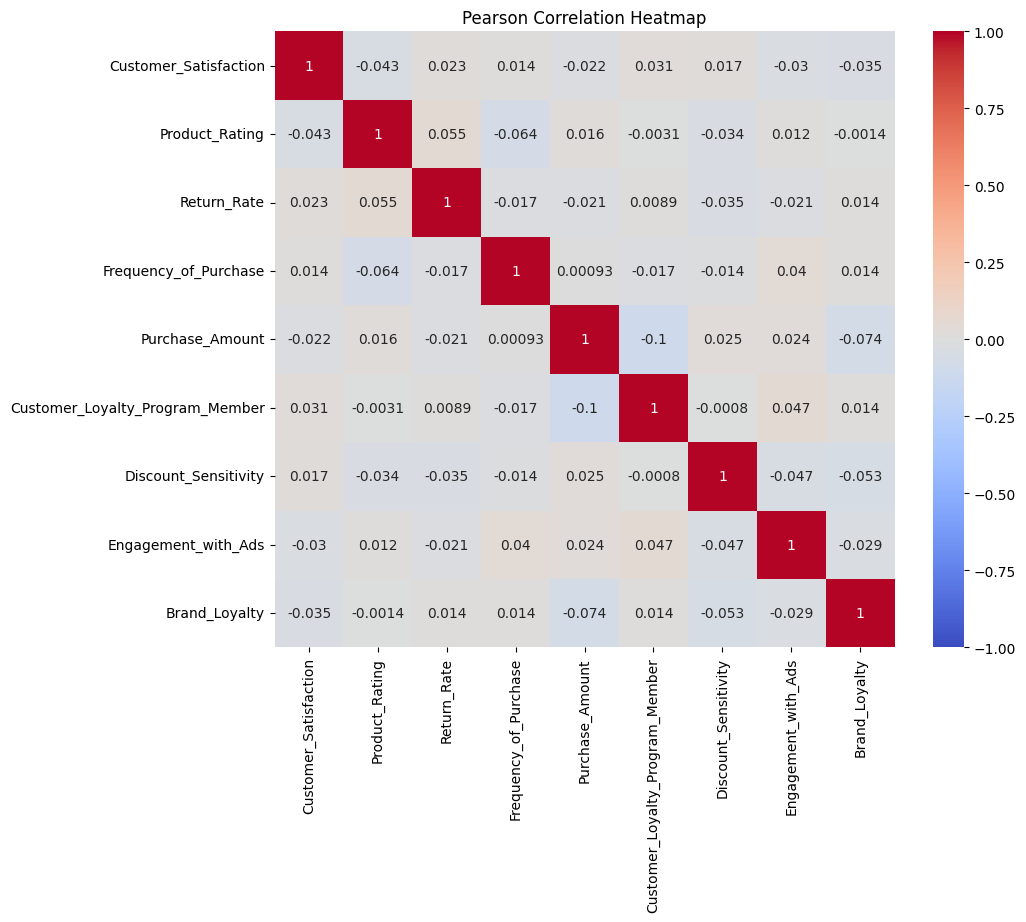

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap")
plt.show()

### Interpretation

Heatmap visually confirms the near-zero correlations. No red (positive) or blue (negative) blocks appear strongly. Indicates **no linear patterns exist** in the dataset.

## Spearman Correlation

In [104]:
spearman_corr = df_corr.corr(method='spearman')
spearman_corr

,Customer_Satisfaction,Product_Rating,Return_Rate,Frequency_of_Purchase,Purchase_Amount,Customer_Loyalty_Program_Member,Discount_Sensitivity,Engagement_with_Ads,Brand_Loyalty
Customer_Satisfaction,1.000000,-0.042964,0.022904,0.013655,-0.021683,0.031008,0.016670,-0.029835,-0.035086
Product_Rating,-0.042964,1.000000,0.055078,-0.063457,0.014607,-0.003756,-0.034340,0.011678,-0.001655
Return_Rate,0.022904,0.055078,1.000000,-0.017139,-0.020365,0.008009,-0.033381,-0.020025,0.014311
Frequency_of_Purchase,0.013655,-0.063457,-0.017139,1.000000,0.001379,-0.016430,-0.014759,0.039931,0.014831
Purchase_Amount,-0.021683,0.014607,-0.020365,0.001379,1.000000,-0.102942,0.025828,0.022500,-0.074214
Customer_Loyalty_Program_Member,0.031008,-0.003756,0.008009,-0.016430,-0.102942,1.000000,-0.000845,0.047429,0.014598
Discount_Sensitivity,0.016670,-0.034340,-0.033381,-0.014759,0.025828,-0.000845,1.000000,-0.047116,-0.052513
Engagement_with_Ads,-0.029835,0.011678,-0.020025,0.039931,0.022500,0.047429,-0.047116,1.000000,-0.029254
Brand_Loyalty,-0.035086,-0.001655,0.014311,0.014831,-0.074214,0.014598,-0.052513,-0.029254,1.000000


### Interpretation

Like Pearson, Spearman correlations are also **extremely small**. No monotonic (rank-based) relationships exist. Confirms that Brand_Loyalty is not explained by these variables, even in nonlinear ranking form.

### Spearman Heatmap

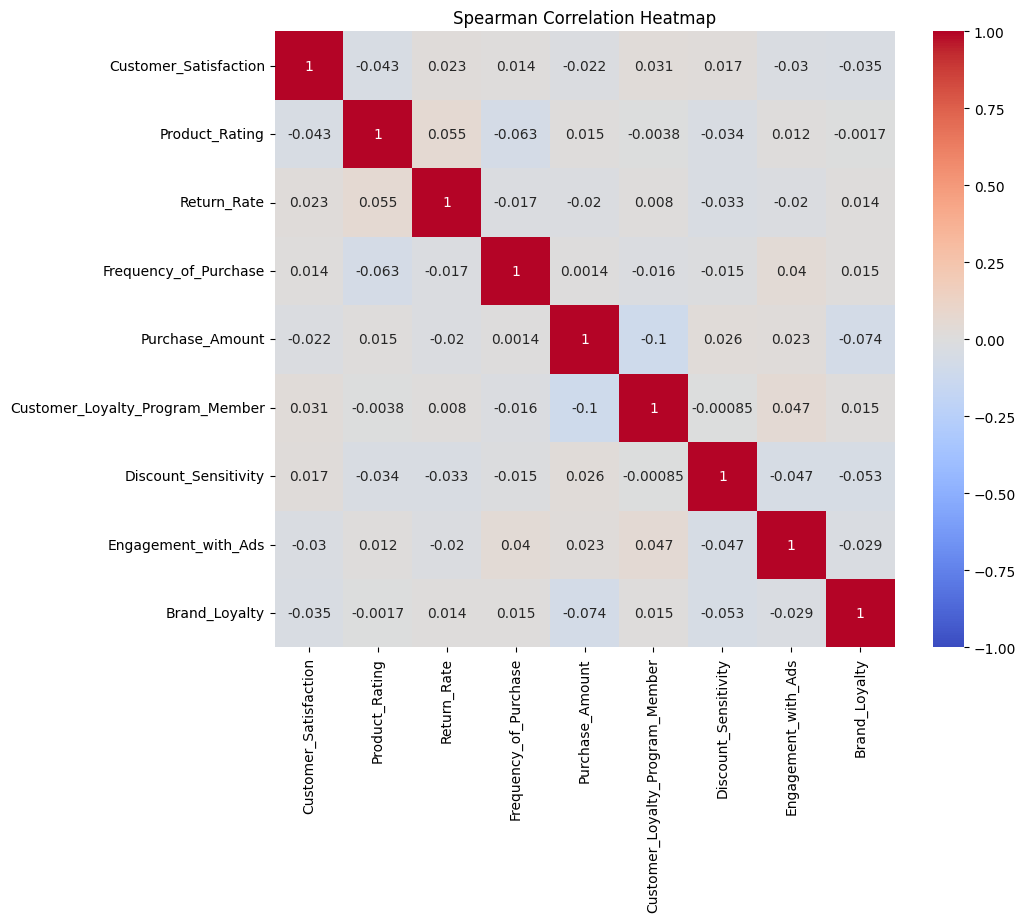

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.show()

## Regression Analysis

In [107]:
# prepare features
X = df_corr.drop(columns=['Brand_Loyalty'])
y = df_corr['Brand_Loyalty']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Brand_Loyalty   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.346
Date:                Sat, 06 Dec 2025   Prob (F-statistic):              0.217
Time:                        21:35:33   Log-Likelihood:                -1761.4
No. Observations:                1000   AIC:                             3541.
Df Residuals:                     991   BIC:                             3585.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               3.5013      0.244     14.338      0.000       3.022       3.981
Customer_Satisfaction              -0.0184      0.016     -1.174      0.241      -0.049       0.012
Product_Rating                     -0.0028      0.031     -0.088      0.930      -0.064       0.059
Return_Rate                         0.0199      0.055      0.359      0.720      -0.089       0.129
Frequency_of_Purchase               0.0071      0.014      0.497      0.619      -0.021       0.035
Purchase_Amount                    -0.0008      0.000     -2.256      0.024      -0.001      -0.000
Customer_Loyalty_Program_Member     0.0277      0.090      0.308      0.758      -0.149       0.205
Discount_Sensitivity               -0.0878      0.054     -1.614      0.107      -0.194       0.019
Engagement_with_Ads                -0.0392      0.039     -0.994      0.320      -0.116       0.038
==============================================================================
Omnibus:                     1298.009   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.451
Skew:                          -0.033   Prob(JB):                     3.72e-15
Kurtosis:                       1.739   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression Interpretation

Purchase_Amount is the only statistically significant predictor

* Coefficient = –0.102
* p = 0.024
* Interpretation: Higher spenders tend to report lower brand loyalty.

All other predictors have non-significant p-values. Regression confirms the correlation findings. The overall model has weak explanatory power.

## Variance Inflation Factor (VIF)
Checks multicollinearity among features.

In [108]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i) for i in range(X.shape[1])
]
vif_data

,feature,VIF
0,const,29.790928
1,Customer_Satisfaction,1.005016
2,Product_Rating,1.010367
3,Return_Rate,1.005879
4,Frequency_of_Purchase,1.006631
5,Purchase_Amount,1.013272
6,Customer_Loyalty_Program_Member,1.014585
7,Discount_Sensitivity,1.005679
8,Engagement_with_Ads,1.008471


### Interpretation

All VIF values ≈ 1.0–1.02. No multicollinearity.

Regression coefficients are stable and reliable. Confirms that the weak predictive power is not due to feature redundancy

## Final Analysis Summary

The correlation and regression analyses indicate that none of the measured customer behavior, satisfaction, or marketing engagement variables show a meaningful relationship with Brand_Loyalty. All Pearson and Spearman correlations were close to zero, and none were statistically significant at p < 0.05.

In the regression model, Purchase_Amount was the only predictor with a statistically significant relationship to brand loyalty (coef = –0.10, p = 0.024). This suggests that customers who spend more tend to report slightly lower brand loyalty, possibly indicating variety-seeking or price-driven purchasing behavior among high-value shoppers.

Multicollinearity was not present (all VIFs ≈ 1), confirming the stability of the regression.

Overall, the results imply that the drivers of brand loyalty in this dataset are likely not captured by the selected behavioral or satisfaction variables. Loyalty may instead depend on unmeasured psychological or experiential factors such as brand affinity, identity alignment, product variety, or past brand relationships.